## Mini Project III

### Problem Statement
1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).

Data: 
* twm_customer - information about customers
* twm_accounts - information about accounts
* twm_checking_accounts - information about checking accounts (subset of twm_accounts)
* twm_credit_accounts - information about checking accounts (subset of twm_accounts)
* twm_savings_accounts - information about checking accounts (subset of twm_accounts)
* twm_transactions - information about financial transactions
* twm_savings_tran - information about savings transactions (subset of twm_transactions)
* twm_checking_tran - information about savings transactions (subset of twm_transactions)
* twm_credit_tran - information about credit checking (subset of twm_transactions)

## 1. Hypothesis generation


## 2. Data Exploration

### Read csv files

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Files
customers_df = pd.read_csv('./data/mini-project-III/twm_customer.csv' , delimiter=';')
accounts_df = pd.read_csv('./data/mini-project-III/twm_accounts.csv' , delimiter=';')
checking_acct_df = pd.read_csv('./data/mini-project-III/twm_checking_acct.csv' , delimiter=';')
credit_acct_df = pd.read_csv('./data/mini-project-III/twm_credit_acct.csv' , delimiter=';')
savings_acct_df = pd.read_csv('./data/mini-project-III/twm_savings_acct.csv' , delimiter=';')
transactions_df = pd.read_csv('./data/mini-project-III/twm_transactions.csv' , delimiter=';')
savings_tran_df = pd.read_csv('./data/mini-project-III/twm_savings_tran.csv' , delimiter=';')
cheking_tran_df = pd.read_csv('./data/mini-project-III/twm_checking_tran.csv' , delimiter=';')
credit_tran_df = pd.read_csv('./data/mini-project-III/twm_credit_tran.csv' , delimiter=';')

In [3]:
print("Customers columns: ",customers_df.columns)
print("Customers columns: ",len(customers_df.columns))
print("Customers rows: ",len(customers_df))
customers_df.head()

Customers columns:  Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'],
      dtype='object')
Customers columns:  15
Customers rows:  747


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [4]:
total = customers_df.isnull().sum().sort_values(ascending=False)
percent = (customers_df.isnull().sum()/customers_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
name_prefix,0,0.0
first_name,0,0.0
last_name,0,0.0


In [5]:
#check for dupes for Id
idsUnique = len(set(customers_df.cust_id))
idsTotal = customers_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [7]:
customers_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [8]:
customers_df.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

In [ ]:
# Select variables from original dataset
# keep cust_id, income, age, years_with_bank, nbr_children, gender, marital_status, name_prefix,postal_code, city_name and state_code
# drop first_name, last_name, street_nbr, street_name

In [9]:
for col in customers_df.dtypes[customers_df.dtypes == 'object'].index:
    print(f"Variable: {col} unique values: ", customers_df[col].nunique())

Variable: gender unique values:  2
Variable: name_prefix unique values:  6
Variable: first_name unique values:  406
Variable: last_name unique values:  343
Variable: street_name unique values:  122
Variable: city_name unique values:  69
Variable: state_code unique values:  33


### Explore numeric variables

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

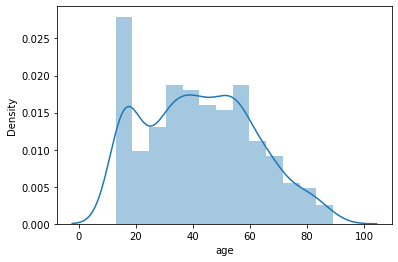

In [10]:
sns.distplot(customers_df["age"])

In [11]:
customers_df['age'].mode()

0    15
dtype: int64

In [12]:
customers_df.groupby(by='gender').count()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
gender,,,,,,,,,,,,,,
F,418,418,418,418,418,418,418,418,418,418,418,418,418,418
M,329,329,329,329,329,329,329,329,329,329,329,329,329,329


<AxesSubplot:xlabel='postal_code', ylabel='Density'>

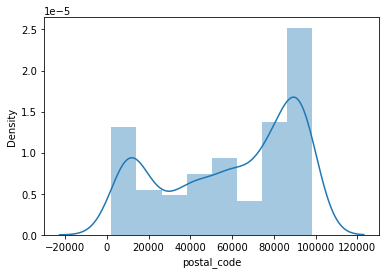

In [14]:
sns.distplot(customers_df["postal_code"])

In [15]:
def num_cat_variables(variable,df):
    print("Variable: ", variable)
    print(df[variable].describe())

In [16]:
# How many products
#data['Item_Identifier'].describe()
for col in customers_df.dtypes[customers_df.dtypes == 'object'].index:
    num_cat_variables(col,customers_df)
    print("Unique values: ", customers_df[col].unique())
    print('')

Variable:  gender
count     747
unique      2
top        F 
freq      418
Name: gender, dtype: object
Unique values:  ['M ' 'F ']

Variable:  name_prefix
count          747
unique           6
top               
freq           505
Name: name_prefix, dtype: object
Unique values:  ['        ' 'Mr.     ' 'Ms.     ' 'Mrs.    ' 'Dr.     ' 'Miss    ']

Variable:  first_name
count                                                   747
unique                                                  406
top       Debbie                                        ...
freq                                                      7
Name: first_name, dtype: object
Unique values:  ['Donald                                                      '
 'ChingDyi                                                    '
 'Rosa                                                        '
 'Lisa                                                        '
 'Barbara                                                     '
 'Terry               

<AxesSubplot:>

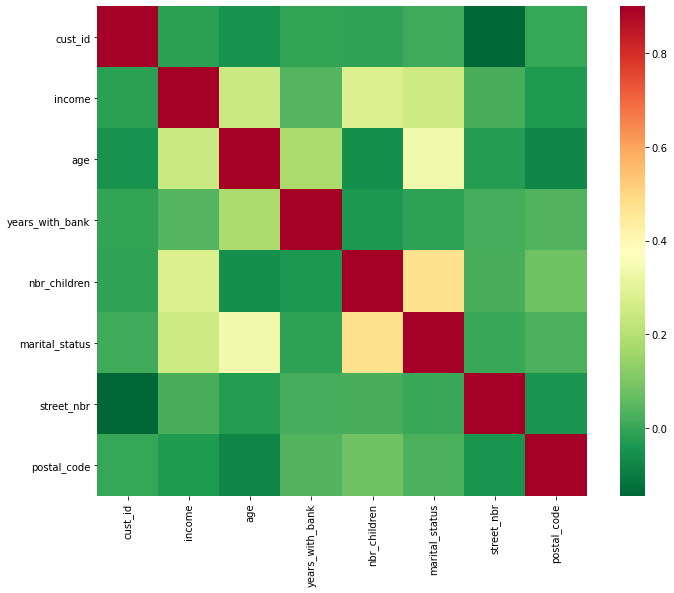

In [54]:
#correlation matrix
corrmat = customers_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True,cmap="RdYlGn_r")

#### ordinal
##### nominal gender, name_prefix
#### numeric cust_id, income, age, years)with_bank???, nbr_children???, marital_status, street_


1. cust_id             int64
2. income              keep
3. age                 keep
4. years_with_bank     keep
5. nbr_children        drop
6. gender             nominal
7. marital_status      keep
8. name_prefix        drop - nominal - could be releated with gender
9. first_name         drop
10. last_name          drop
11. street_nbr         drop
12. street_name        drop - verify if it is important
13. postal_code        keep int64
14. city_name          keep object
15. state_code         keep object

In [17]:
def print_some_info(df):
    print("Customers columns: ",df.columns)
    print("Customers columns: ",len(df.columns))
    print("Customers rows: ",len(df))

In [18]:
print_some_info(accounts_df)
accounts_df.head()

Customers columns:  Index(['acct_nbr', 'cust_id', 'acct_type', 'account_active', 'acct_start_date',
       'acct_end_date', 'starting_balance', 'ending_balance'],
      dtype='object')
Customers columns:  8
Customers rows:  1409


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [19]:
print_some_info(checking_acct_df)
checking_acct_df.head()

Customers columns:  Index(['cust_id', 'acct_nbr', 'minimum_balance', 'per_check_fee',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')
Customers columns:  9
Customers rows:  520


,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [20]:
print_some_info(credit_acct_df)
credit_acct_df.head()

Customers columns:  Index(['cust_id', 'acct_nbr', 'credit_limit', 'credit_rating',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')
Customers columns:  9
Customers rows:  468


,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [21]:
print_some_info(savings_acct_df)
savings_acct_df.head()

Customers columns:  Index(['cust_id', 'acct_nbr', 'minimum_balance', 'acct_type', 'account_active',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')
Customers columns:  9
Customers rows:  421


,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [22]:
print_some_info(transactions_df)
transactions_df.head()

Customers columns:  Index(['tran_id', 'acct_nbr', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')
Customers columns:  10
Customers rows:  77580


,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [23]:
print_some_info(savings_tran_df)
savings_tran_df.head(200)

Customers columns:  Index(['cust_id', 'tran_id', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')
Customers columns:  10
Customers rows:  11189


,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
195,1362656,29,-401.16,-401.16,0.00,303.92,26.10.1995,151556,B,WD
196,1363452,1,3.30,0.00,3.30,2426.99,31.1.1995,235959,,IN
197,1363316,2,0.40,0.00,0.40,318.84,28.2.1995,235959,,IN
198,1362542,23,-597.15,-597.15,0.00,678.16,19.12.1995,234254,C,TR


In [24]:
print_some_info(cheking_tran_df)
cheking_tran_df.head()

Customers columns:  Index(['cust_id', 'tran_id', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')
Customers columns:  10
Customers rows:  46204


,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [25]:
print_some_info(credit_tran_df)
credit_tran_df.head()

Customers columns:  Index(['cust_id', 'tran_id', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')
Customers columns:  10
Customers rows:  20167


,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
